## Exercise - Model Estimation & Evaluation

This is an exercise on parametric model estimation & model evaluation using a Wines dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.tight_layout()
import seaborn as sns
%matplotlib inline

from scipy.stats import norm

### Read from CSV File & Preliminary EDA

After reading from the CSV file, perform EDA for `points` and `price`.

In [2]:
wines_df = pd.read_csv('winemag-sample.csv')
wines_df.head(3)

,title,country,variety,points,price
0,Ca' del Bosco NV Cuvée Prestige Rosé Sparkling...,Italy,Sparkling Blend,89,60.0
1,Robert Hall 2011 Sauvignon Blanc (Paso Robles),US,Sauvignon Blanc,86,14.0
2,Banfi 1999 Brachetto d'Acqui,Italy,Sangiovese,87,23.0


Text(0.5,1,'BOXPLOT OF PRICE OF ALL WINES')

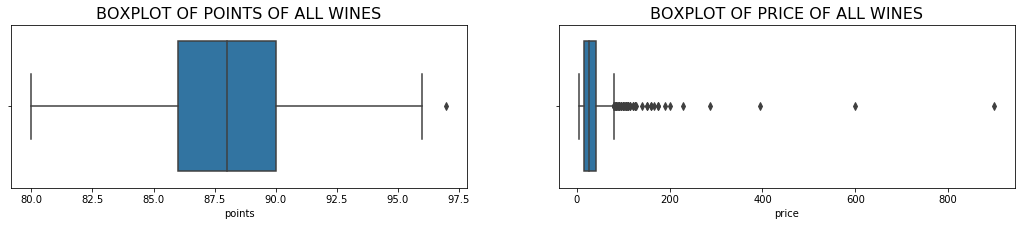

In [3]:
fig = plt.figure(figsize=(18, 3))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
sns.boxplot(wines_df['points'], ax=ax1)
ax1.set_title("BOXPLOT OF POINTS OF ALL WINES", fontsize=16)
sns.boxplot(wines_df['price'], ax=ax2)
ax2.set_title("BOXPLOT OF PRICE OF ALL WINES", fontsize=16)

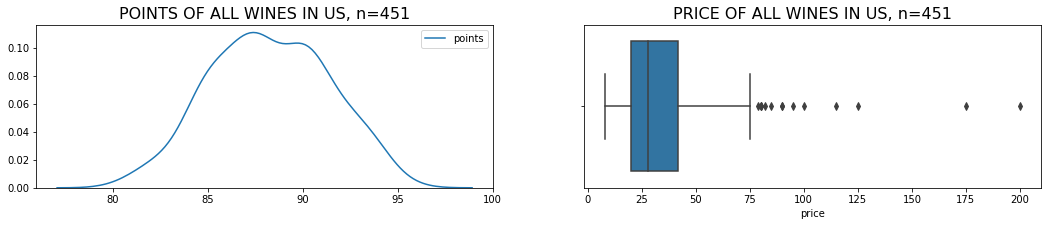

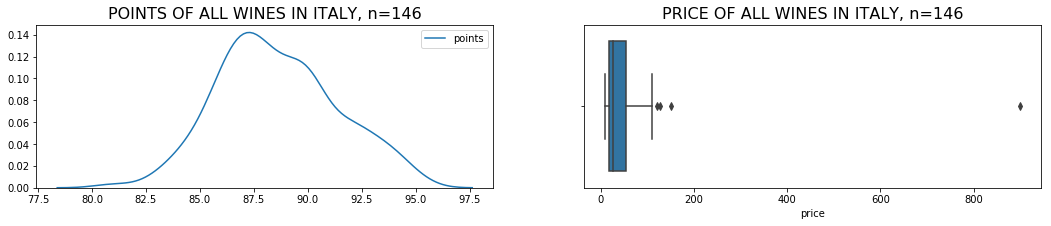

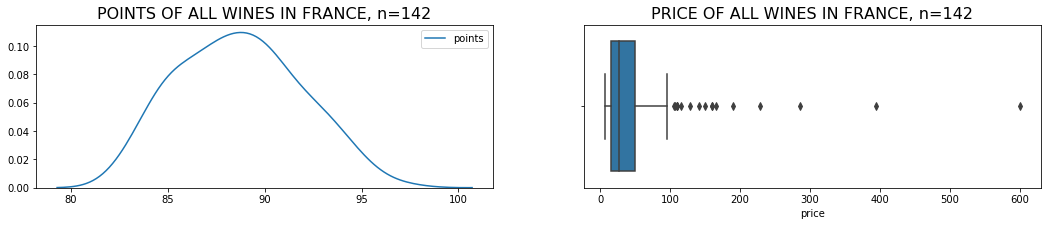

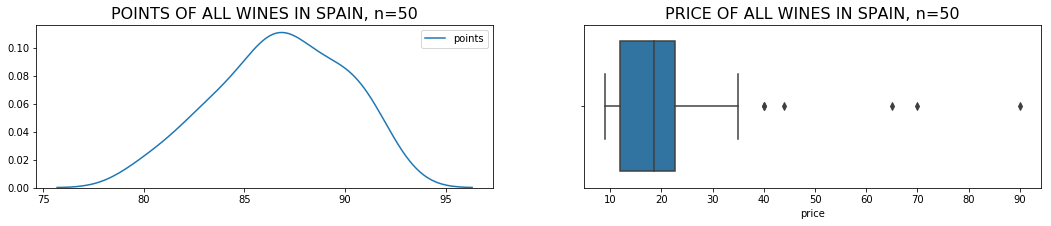

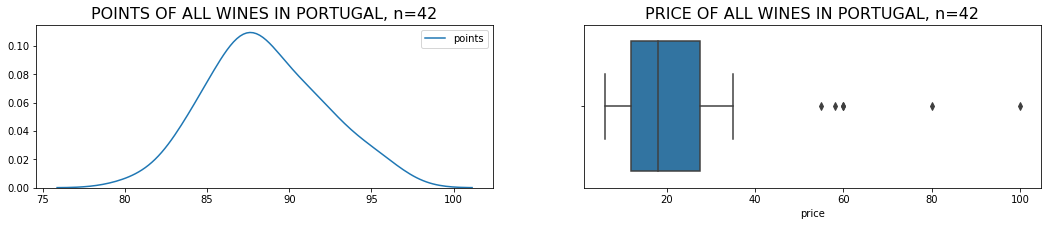

In [4]:
# Find top 5 wine producing countries.
top_countries = wines_df.groupby('country').size().reset_index(name='n').sort_values('n', ascending=False)[:5]['country'].tolist()
for c in top_countries:
    c_df = wines_df[wines_df.country == c]
    fig = plt.figure(figsize=(18, 3))
    ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
    sns.kdeplot(c_df['points'], ax=ax1)
    ax1.set_title("POINTS OF ALL WINES IN %s, n=%d" % (c.upper(), c_df.shape[0]), fontsize=16)
    sns.boxplot(c_df['price'], ax=ax2)
    ax2.set_title("PRICE OF ALL WINES IN %s, n=%d" % (c.upper(), c_df.shape[0]), fontsize=16)
    plt.show()

### Model Fitting (Parametric Estimation)

Let's take a look at the wines from the US.

In [5]:
us_wines_df = wines_df.copy()
us_wines_df = us_wines_df[us_wines_df.country == 'US']
us_wines_df.reset_index(drop=True, inplace=True)
us_wines_points = us_wines_df['points']
sorted_us_wines_points = us_wines_points.sort_values(ascending=True)

From the above plot, it seems that the points have a nice bell curve and fit a normal distribution. Hence, let's attempt to fit the points of US wines to a normal curve.

In [6]:
fitted_mu, fitted_sigma = norm.fit(us_wines_points)
print(fitted_mu,fitted_sigma**2)
print(us_wines_points.mean(),us_wines_points.var())

88.2749445676275 9.74702189271439
88.2749445676275 9.768681941364868


For US Wines points, we now know that $\hat{\mu}=88.275$ and $\hat{\sigma}^2=9.747$. Let's see what the histogram and the fitted line looks like.

In [7]:
# To plot the fitted, use norm.pdf to get the respective probabilities df
points_min, points_max = us_wines_points.min(), us_wines_points.max()
points_x = np.linspace(points_min-2, points_max+2, 100)
fitted_kde = norm.pdf(points_x, fitted_mu, fitted_sigma)
fitted_df = pd.DataFrame({'x' : points_x, 'p_hat' : fitted_kde})

/Users/bryanlim/.pyenv/versions/3.4.8/envs/ds-toolkit/lib/python3.4/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


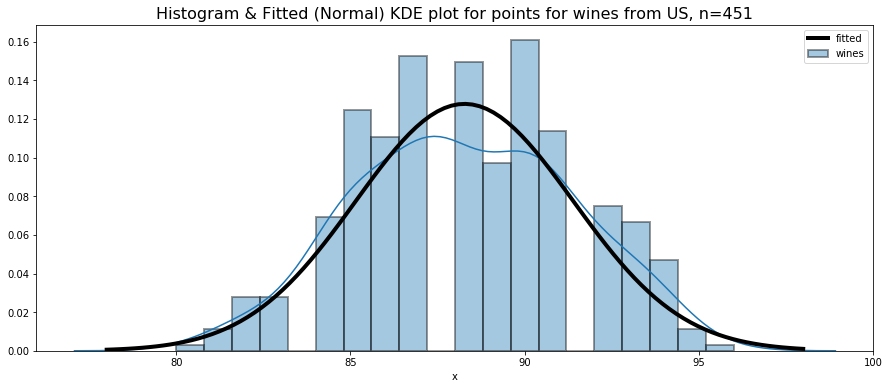

In [8]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

sns.distplot(us_wines_points, bins=20, hist_kws=dict(edgecolor="k", linewidth=2), ax=ax)
fitted_df.plot(kind='line', x='x', y='p_hat', linewidth=4, color='black', ax=ax)

ax.set_title("Histogram & Fitted (Normal) KDE plot for points for wines from US, n=%d" % us_wines_points.count(), fontsize=16)
ax.legend(['fitted', 'wines',])
plt.show()

### Model Evaluation: Graphical Methods
Now, we know that the fitted is a fair approximation to the empirical. However, are there better tools for us to evaluate this model well? We first use graphical methods to evaluate, and the first plot is the p-p plot.

In [9]:
pp_df = pd.DataFrame({'x' : sorted_us_wines_points})
pp_df.reset_index(inplace=True, drop=True)
pp_df['i'] = pp_df.index+1
# Empirical distribution, where p_i = i/(M+1)
pp_df['p_i'] = pp_df['i'].apply(lambda x : x/(pp_df['x'].count() + 1))
pp_df['p_fitted'] = norm.cdf(pp_df['x'], fitted_mu, fitted_sigma)
# Let's also just add the 45-deg line df here for easy plotting
forty_five_line_df = pd.DataFrame({'x' : [0,1], 'y' : [0,1]})

Text(0.5,1,'p-p plot for points')

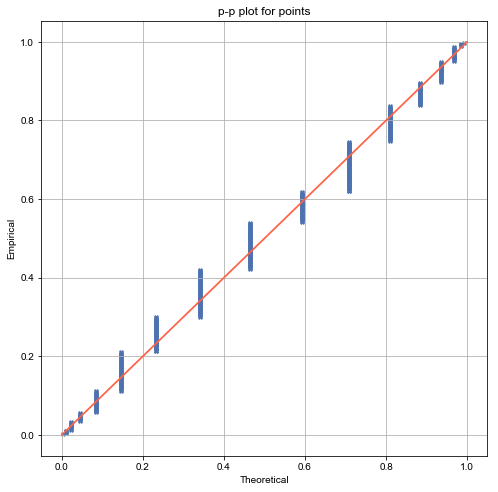

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
sns.set()
pp_df.plot(kind='scatter', x='p_fitted', y='p_i', ax=ax, marker='X')
forty_five_line_df.plot(kind='line', x='x', y='y', ax=ax, color='tomato')
ax.set_ylabel("Empirical")
ax.set_xlabel("Theoretical")
ax.legend('')
ax.set_title("p-p plot for points")

In [11]:
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# pp_df.plot(kind='line', x='i', y='p_i', ax=ax)
# pp_df.plot(kind='line', x='i', y='p_fitted', ax=ax)
# ax.set_title("CDF plot for points")
# ax.legend(['Emprical', 'Theoretical'])
# plt.show()